# 자원 최적화

## 라이브러리 호출 및 데이터 확인

In [51]:
# 라이브러리 호출
import random
from numpy.random import randint
from numpy.random import rand
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import mip
import pycaret
from pycaret.regression import *

In [52]:
df_m = pd.read_csv('./data/공정 데이터 2022년 8월.csv')
df_p1 = pd.read_csv('./data/프레스 1호-유압모터 전류데이터.csv', index_col=0)
df_p2 = pd.read_csv('./data/프레스 2호-유압모터 전류데이터.csv', index_col=0)
df_p3 = pd.read_csv('./data/프레스 3호-유압모터 전류데이터.csv', index_col=0)
df_p4 = pd.read_csv('./data/프레스 4호-유압모터 전류데이터.csv', index_col=0)
df_r1 = pd.read_csv('./data/로봇 1호-전류 데이터.csv', index_col=0)
df_r2 = pd.read_csv('./data/로봇 2호-전류 데이터.csv', index_col=0)

In [53]:
# 필요없는 컬럼 삭제

df_m = df_m.drop(['idx', 'lineno', 'Order_date', 'cnt', 'day_night_type'], axis=1)
df_m

,itemno,product_date,quantity
0,76211-A3010-100,2022-08-10 7:57,5
1,76211-A3010-100,2022-08-10 7:58,2
2,76211-A3010-100,2022-08-10 7:59,3
3,76211-A3010-100,2022-08-10 7:59,3
4,76211-A3010-100,2022-08-10 8:00,3
...,...,...,...
55002,77221-G6000-100,2022-08-31 23:52,1
55003,77211-G6000-100,2022-08-31 23:52,2
55004,77221-G6000-100,2022-08-31 23:52,2
55005,77211-G6000-100,2022-08-31 23:52,1


In [54]:
display(df_m.info(), df_m)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55007 entries, 0 to 55006
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   itemno        55007 non-null  object
 1   product_date  55007 non-null  object
 2   quantity      55007 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


None

,itemno,product_date,quantity
0,76211-A3010-100,2022-08-10 7:57,5
1,76211-A3010-100,2022-08-10 7:58,2
2,76211-A3010-100,2022-08-10 7:59,3
3,76211-A3010-100,2022-08-10 7:59,3
4,76211-A3010-100,2022-08-10 8:00,3
...,...,...,...
55002,77221-G6000-100,2022-08-31 23:52,1
55003,77211-G6000-100,2022-08-31 23:52,2
55004,77221-G6000-100,2022-08-31 23:52,2
55005,77211-G6000-100,2022-08-31 23:52,1


In [55]:
# itemno(품목)의 unique 값 및 개수 확인
df_m['itemno'].unique(), len(df_m['itemno'].unique())

(array(['76211-A3010-100', '73721-G6000-100', '77111-G6000-100',
        '77121-G6000-100', '76111-G6000-100', '76121-G6000-100',
        '76211-G6000-100', '73711-G6000-100', '77111-A3000-100',
        '77211-A3010-100', '66411-AT000-100', '66421-AT000-100',
        '77211-G6000-100', '77221-G6000-100', '72811-DB000-100',
        '76121-G6010-100', '76111-G6010-100', '77221-A3010-100',
        '77221-A3000-100', '76121-A3000-100', '76211-A3000-100',
        '77111-G6010-100', '77121-G6010-100', '76111-A3000-100',
        '76221-A3000-100', '76221-A3010-100', '77121-A3000-100',
        '66411-G5000-100', '72821-DB000-100', '66421-G5000-100',
        '66411-J6000-100', '65514-M6200-100', '64312-Q4000-100',
        '66311-G5500-100', '73711-G5000-100', '73721-G5000-100'],
       dtype=object),
 36)

In [56]:
display(df_p1.info(), df_p1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32534 entries, 1 to 32534
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time_s[s]  32534 non-null  object 
 1   RMS[A]     32534 non-null  float64
dtypes: float64(1), object(1)
memory usage: 762.5+ KB


None

,Time_s[s],RMS[A]
1,2022-07-17 12:09,3.790000e-15
2,2022-07-17 12:11,3.790000e-15
3,2022-07-17 12:12,3.790000e-15
4,2022-07-17 12:14,3.790000e-15
5,2022-07-17 12:18,3.790000e-15
...,...,...
32530,2022-08-31 23:48,5.933426e+00
32531,2022-08-31 23:50,5.944377e+00
32532,2022-08-31 23:53,5.934289e+00
32533,2022-08-31 23:57,5.952571e+00


In [57]:
display(df_p2.info(), df_p2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32452 entries, 1 to 32452
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time_s[s]        32452 non-null  object 
 1   Acceleration[g]  32452 non-null  float64
dtypes: float64(1), object(1)
memory usage: 760.6+ KB


None

,Time_s[s],Acceleration[g]
1,2022-07-17 12:10,0.007594
2,2022-07-17 12:12,0.007906
3,2022-07-17 12:13,0.008337
4,2022-07-17 12:15,0.007794
5,2022-07-17 12:16,0.008040
...,...,...
32448,2022-08-31 23:51,5.453872
32449,2022-08-31 23:52,5.466655
32450,2022-08-31 23:55,5.446658
32451,2022-08-31 23:56,5.458035


In [58]:
display(df_p3.info(), df_p3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29593 entries, 1 to 29593
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time_s[s]  29593 non-null  object 
 1   RMS[A]     29593 non-null  float64
dtypes: float64(1), object(1)
memory usage: 693.6+ KB


None

,Time_s[s],RMS[A]
1,2022-07-17 12:14,0.007285
2,2022-07-17 12:15,0.007853
3,2022-07-17 12:17,0.007924
4,2022-07-17 12:18,0.007517
5,2022-07-17 12:20,0.006996
...,...,...
29589,2022-08-31 23:52,0.004963
29590,2022-08-31 23:53,0.004706
29591,2022-08-31 23:55,0.004674
29592,2022-08-31 23:57,0.004385


In [59]:
display(df_p4.info(), df_p4)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29516 entries, 1 to 29516
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time_s[s]  29516 non-null  object 
 1   RMS[A]     29516 non-null  float64
dtypes: float64(1), object(1)
memory usage: 691.8+ KB


None

,Time_s[s],RMS[A]
1,2022-07-17 12:15,3.790000e-15
2,2022-07-17 12:17,3.790000e-15
3,2022-07-17 12:19,3.790000e-15
4,2022-07-17 12:23,3.790000e-15
5,2022-07-17 15:42,2.254556e-02
...,...,...
29512,2022-08-31 23:53,4.562604e-03
29513,2022-08-31 23:54,4.171928e-03
29514,2022-08-31 23:56,4.132707e-03
29515,2022-08-31 23:57,4.309568e-03


In [60]:
display(df_r1.info(), df_r1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8219 entries, 1 to 8219
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time_s[s]  8219 non-null   object 
 1   RMS[A]     8219 non-null   float64
dtypes: float64(1), object(1)
memory usage: 192.6+ KB


None

,Time_s[s],RMS[A]
1,2022-07-17 0:01,1.971988
2,2022-07-17 0:06,1.959803
3,2022-07-17 0:07,1.960802
4,2022-07-17 0:12,1.960694
5,2022-07-17 0:14,1.962618
...,...,...
8215,2022-08-31 22:52,1.687518
8216,2022-08-31 23:01,3.947365
8217,2022-08-31 23:07,1.573944
8218,2022-08-31 23:14,11.512992


In [61]:
display(df_r2.info(), df_r2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6545 entries, 1 to 6545
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time_s[s]  6545 non-null   object 
 1   RMS[A]     6545 non-null   float64
dtypes: float64(1), object(1)
memory usage: 153.4+ KB


None

,Time_s[s],RMS[A]
1,2022-07-17 0:01,1.624307
2,2022-07-17 0:06,1.618839
3,2022-07-17 0:13,1.619826
4,2022-07-17 0:24,1.610211
5,2022-07-17 0:30,1.624192
...,...,...
6541,2022-08-31 23:03,1.755417
6542,2022-08-31 23:14,11.976645
6543,2022-08-31 23:28,12.259376
6544,2022-08-31 23:40,2.344283


In [62]:
# 데이터 분포 확인
pd.concat([df_p1.describe(), df_p2.describe(), df_p3.describe(), df_p4.describe(), df_r1.describe(), df_r2.describe()], axis = 1)

,RMS[A],Acceleration[g],RMS[A],RMS[A],RMS[A],RMS[A]
count,3.253400e+04,32452.000000,29593.000000,2.951600e+04,8219.000000,6545.000000
mean,3.283625e+00,2.997782,0.090171,1.092007e-01,8.226586,7.232698
std,2.965904e+00,2.705924,1.446477,1.605324e+00,8.883872,7.137754
min,3.790000e-15,0.003609,0.003458,3.790000e-15,0.727902,0.885310
25%,4.556567e-03,0.005519,0.004249,4.121954e-03,2.062136,1.731107
50%,5.868303e+00,5.328890,0.004443,4.309151e-03,2.568512,2.078341
75%,5.925775e+00,5.429075,0.004707,4.577552e-03,13.176927,12.170405
max,4.419983e+01,36.025730,48.059628,4.846692e+01,45.223701,33.753895


In [63]:
# iteminfo -> 번호로 변경

uq_list = df_m['itemno'].unique()
item_dic = {}

for idx, no in enumerate(uq_list):
    item_dic[no] = idx

df_m['itemno'] = df_m['itemno'].map(item_dic)
df_m

,itemno,product_date,quantity
0,0,2022-08-10 7:57,5
1,0,2022-08-10 7:58,2
2,0,2022-08-10 7:59,3
3,0,2022-08-10 7:59,3
4,0,2022-08-10 8:00,3
...,...,...,...
55002,13,2022-08-31 23:52,1
55003,12,2022-08-31 23:52,2
55004,13,2022-08-31 23:52,2
55005,12,2022-08-31 23:52,1


In [64]:
df_m['itemno'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35], dtype=int64)

In [65]:
# 컬럼 이름 통일

df_m = df_m.rename(columns={'product_date': 'times', 'quantity':'qty'})
df_p1 = df_p1.rename(columns={'Time_s[s]': 'times', 'RMS[A]':'amp_1'})
df_p2 = df_p2.rename(columns={'Time_s[s]': 'times', 'Acceleration[g]':'amp_2'})
df_p3 = df_p3.rename(columns={'Time_s[s]': 'times', 'RMS[A]':'amp_3'})
df_p4 = df_p4.rename(columns={'Time_s[s]': 'times', 'RMS[A]':'amp_4'})
df_r1 = df_r1.rename(columns={'Time_s[s]': 'times', 'RMS[A]':'amp_5'})
df_r2 = df_r2.rename(columns={'Time_s[s]': 'times', 'RMS[A]':'amp_6'})

In [66]:
# 데이터 타입 변경 및 공통기간 데이터 선택

# 1. date time 타입 수정
df_list = [df_m, df_p1, df_p2, df_p3, df_p4, df_r1, df_r2]

for df in df_list:
    df['times'] = pd.to_datetime(df['times'])

# 2. 2022-08-11 ~ 2022-08-31 까지의 데이터만 선택

df_m = df_m[(df_m['times'] >= '2022-08-11 00:00:00') & (df_m['times'] <= '2022-08-31 23:59:59')].reset_index(drop = True)
df_p1 = df_p1[(df_p1['times'] >= '2022-08-11 00:00:00') & (df_p1['times'] <= '2022-08-31 23:59:59')].reset_index(drop = True)
df_p2 = df_p2[(df_p2['times'] >= '2022-08-11 00:00:00') & (df_p2['times'] <= '2022-08-31 23:59:59')].reset_index(drop = True)
df_p3 = df_p3[(df_p3['times'] >= '2022-08-11 00:00:00') & (df_p3['times'] <= '2022-08-31 23:59:59')].reset_index(drop = True)
df_p4 = df_p4[(df_p4['times'] >= '2022-08-11 00:00:00') & (df_p4['times'] <= '2022-08-31 23:59:59')].reset_index(drop = True)
df_r1 = df_r1[(df_r1['times'] >= '2022-08-11 00:00:00') & (df_r1['times'] <= '2022-08-31 23:59:59')].reset_index(drop = True)
df_r2 = df_r2[(df_r2['times'] >= '2022-08-11 00:00:00') & (df_r2['times'] <= '2022-08-31 23:59:59')].reset_index(drop = True)

In [67]:
df_list = [df_m, df_p1, df_p2, df_p3, df_p4, df_r1, df_r2]

# df_m 의 times, itemno 기준 groupby, 합계 산출
df_m = df_m.groupby(['times', 'itemno']).sum().reset_index()

print("전처리 이전")
for df in df_list:
    print(df.head(3))

# 1분단위로 값 생성 
df_m = df_m.set_index('times')
df_p1 = df_p1.set_index('times').resample('1T').median()
df_p2 = df_p2.set_index('times').resample('1T').median()
df_p3 = df_p3.set_index('times').resample('1T').median()
df_p4 = df_p4.set_index('times').resample('1T').median()
df_r1 = df_r1.set_index('times').resample('1T').median()
df_r2 = df_r2.set_index('times').resample('1T').median()
    
df_list = [df_m, df_p1, df_p2, df_p3, df_p4, df_r1, df_r2]
print()
print()
print("전처리 후")
for df in df_list:
    print(df.head(3))

전처리 이전
   itemno               times  qty
0       9 2022-08-11 00:03:00    1
1       9 2022-08-11 00:03:00    1
2       9 2022-08-11 00:03:00    1
                times     amp_1
0 2022-08-11 00:00:00  5.920062
1 2022-08-11 00:03:00  5.924090
2 2022-08-11 00:07:00  5.884381
                times     amp_2
0 2022-08-11 00:00:00  5.413774
1 2022-08-11 00:02:00  5.438412
2 2022-08-11 00:03:00  5.409565
                times     amp_3
0 2022-08-11 00:00:00  0.004669
1 2022-08-11 00:02:00  0.004920
2 2022-08-11 00:05:00  0.004546
                times      amp_4
0 2022-08-11 00:00:00   0.004447
1 2022-08-11 00:02:00  14.618763
2 2022-08-11 00:03:00   0.010959
                times      amp_5
0 2022-08-11 00:03:00   4.323400
1 2022-08-11 00:19:00   8.706882
2 2022-08-11 00:27:00  12.194757
                times      amp_6
0 2022-08-11 00:04:00  19.140257
1 2022-08-11 00:17:00  18.757881
2 2022-08-11 00:24:00  17.768850


전처리 후
                     itemno  qty
times                           

In [68]:
# 하나의 데이터프레임으로 병합

df_sensor = df_p1.join(df_p2, how='outer').join(df_p3, how='outer').join(df_p4, how='outer').join(df_r1, how='outer').join(df_r2, how='outer')
# df_sensor

df = df_m.join(df_sensor, how='left')
# df

# 결측값 0으로 대체
df = df.fillna(0)
df.head()

,itemno,qty,amp_1,amp_2,amp_3,amp_4,amp_5,amp_6
times,,,,,,,,
2022-08-11 00:03:00,9,3,5.924090,5.409565,0.000000,0.010959,4.3234,0.000000
2022-08-11 00:04:00,9,5,0.000000,0.000000,0.000000,0.000000,0.0000,19.140257
2022-08-11 00:05:00,9,9,0.000000,0.000000,0.004546,0.004864,0.0000,0.000000
2022-08-11 00:06:00,9,6,0.000000,5.309373,0.004448,0.000000,0.0000,0.000000
2022-08-11 00:07:00,9,9,5.884381,0.000000,0.000000,0.003873,0.0000,0.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16917 entries, 2022-08-11 00:03:00 to 2022-08-31 23:52:00
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   itemno  16917 non-null  int64  
 1   qty     16917 non-null  int64  
 2   amp_1   16917 non-null  float64
 3   amp_2   16917 non-null  float64
 4   amp_3   16917 non-null  float64
 5   amp_4   16917 non-null  float64
 6   amp_5   16917 non-null  float64
 7   amp_6   16917 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.2 MB


In [70]:
df.describe()

,itemno,qty,amp_1,amp_2,amp_3,amp_4,amp_5,amp_6
count,16917.000000,16917.000000,16917.000000,16917.000000,16917.000000,16917.000000,16917.000000,16917.000000
mean,11.446474,7.189100,3.037748,2.728354,0.009387,0.016748,1.339684,1.030189
std,8.818024,2.235593,2.967980,2.707263,0.375557,0.547618,4.204100,3.629776
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,8.000000,5.837677,5.267213,0.000000,0.000000,0.000000,0.000000
75%,14.000000,9.000000,5.919141,5.410431,0.004447,0.004286,0.000000,0.000000
max,35.000000,11.000000,6.544678,5.930254,42.140625,39.300453,27.099874,26.726574


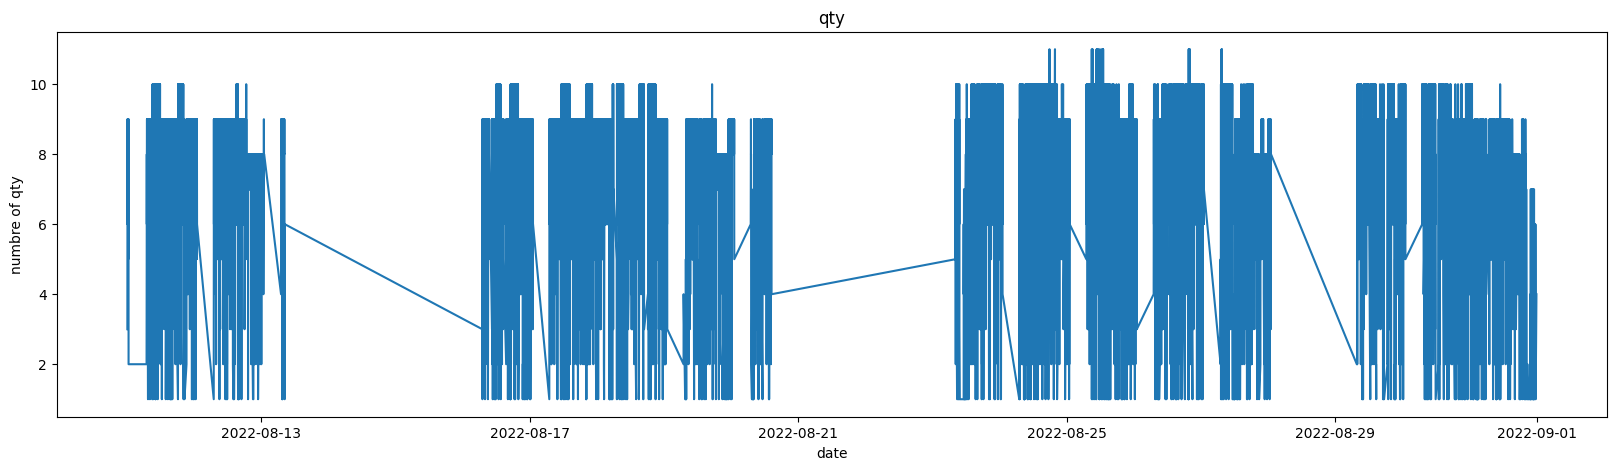

In [71]:
plt.figure(figsize=(20, 5))
plt.xlabel('date')
plt.ylabel('numbre of qty')
plt.title('qty')
plt.plot(df['qty'])
plt.show()

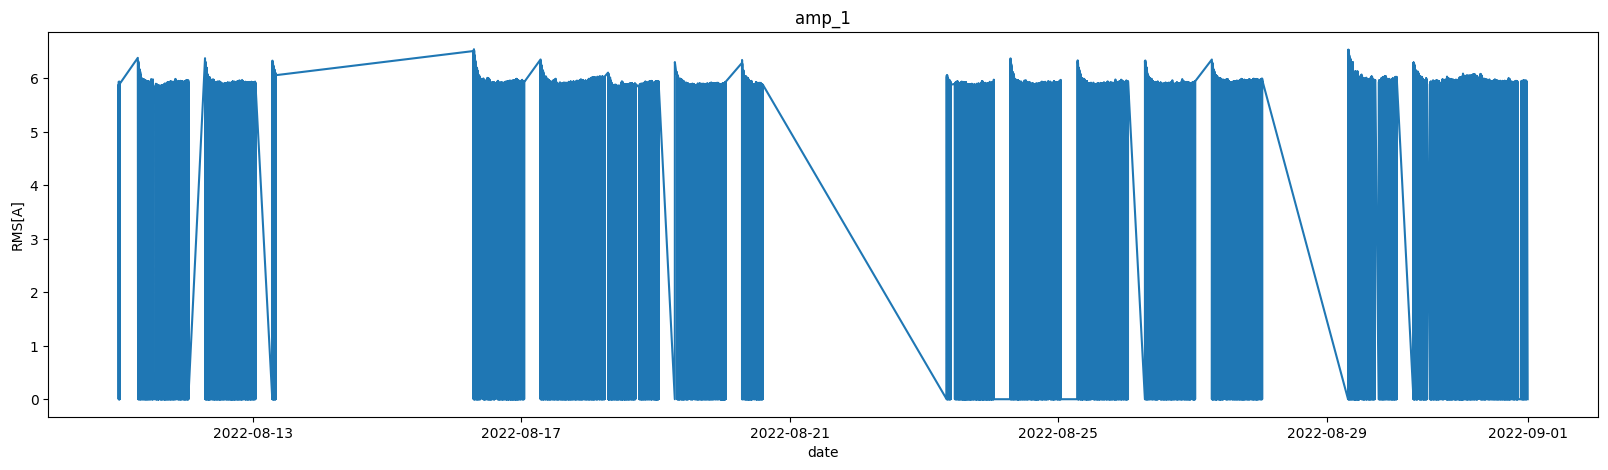

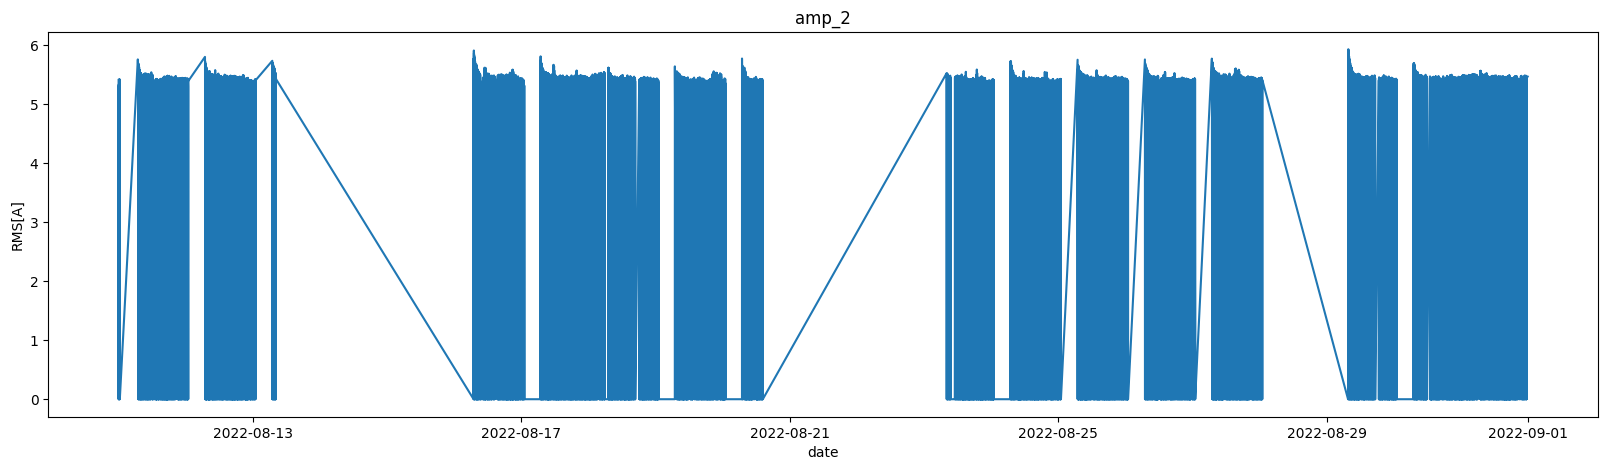

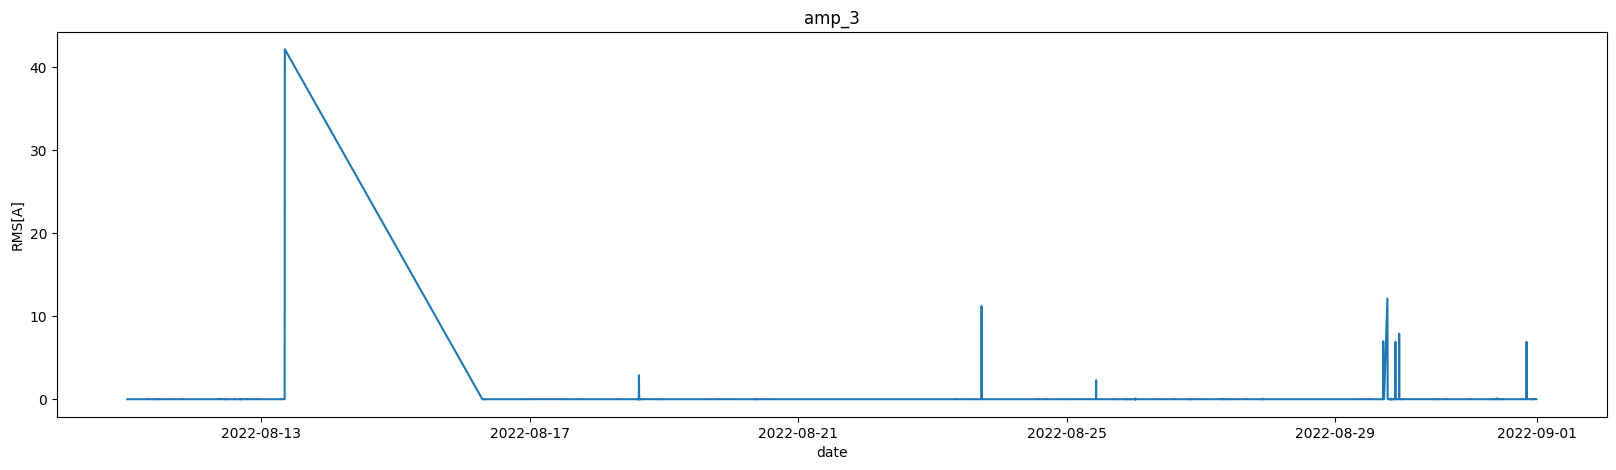

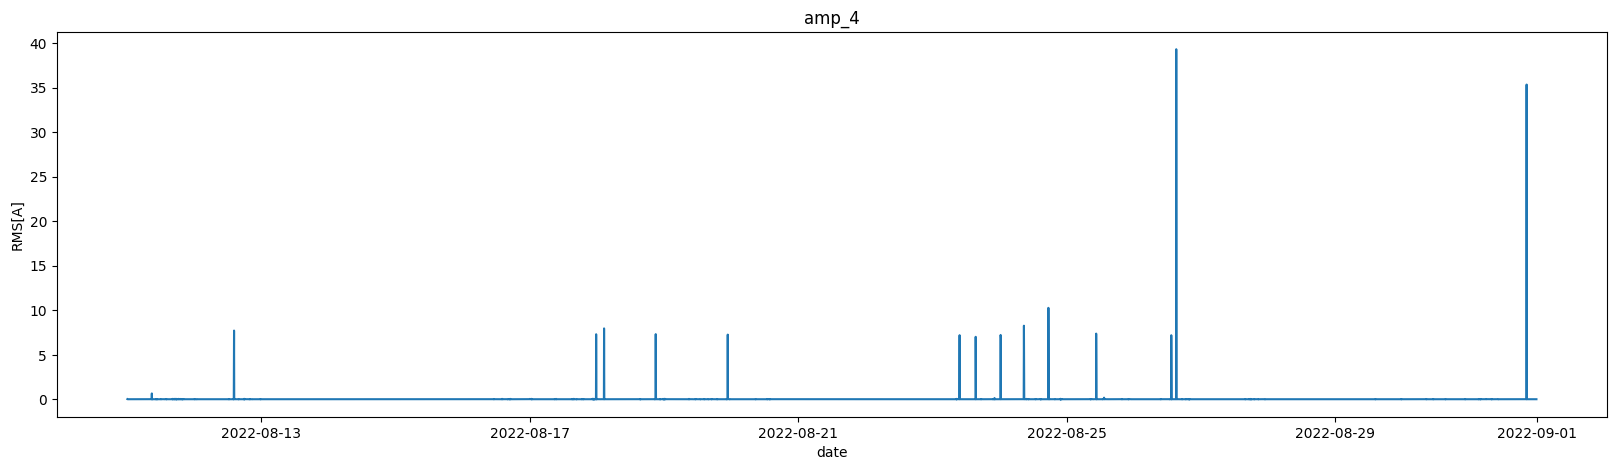

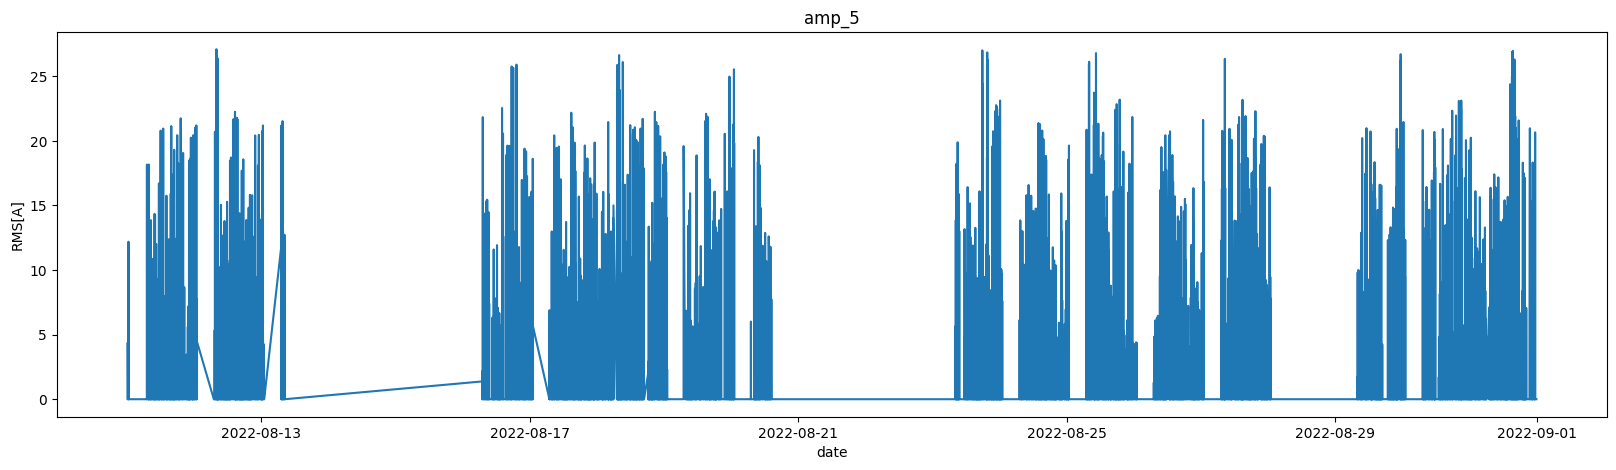

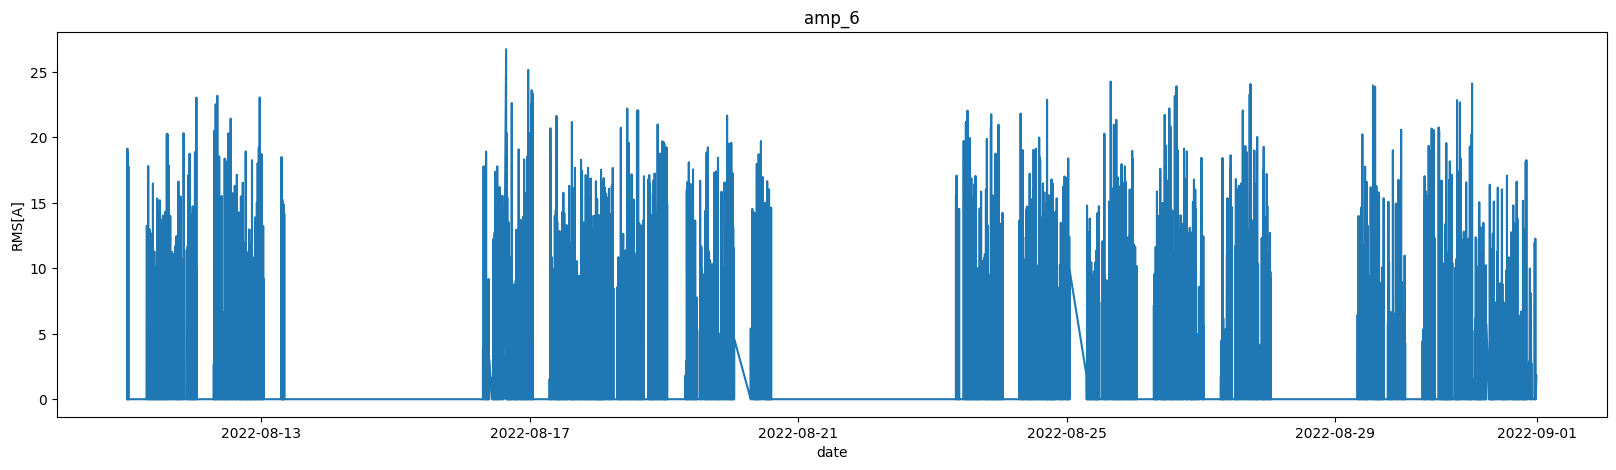

In [72]:
amp_list = ['amp_1', 'amp_2', 'amp_3', 'amp_4', 'amp_5', 'amp_6']
for amp in amp_list:
    plt.figure(figsize=(20, 5))
    plt.xlabel('date')
    plt.ylabel('RMS[A]')
    plt.title(amp)
    plt.plot(df[amp])
    plt.show()

In [73]:
df

,itemno,qty,amp_1,amp_2,amp_3,amp_4,amp_5,amp_6
times,,,,,,,,
2022-08-11 00:03:00,9,3,5.924090,5.409565,0.000000,0.010959,4.3234,0.000000
2022-08-11 00:04:00,9,5,0.000000,0.000000,0.000000,0.000000,0.0000,19.140257
2022-08-11 00:05:00,9,9,0.000000,0.000000,0.004546,0.004864,0.0000,0.000000
2022-08-11 00:06:00,9,6,0.000000,5.309373,0.004448,0.000000,0.0000,0.000000
2022-08-11 00:07:00,9,9,5.884381,0.000000,0.000000,0.003873,0.0000,0.000000
...,...,...,...,...,...,...,...,...
2022-08-31 23:29:00,13,2,5.941137,5.456436,0.004759,0.000000,0.0000,0.000000
2022-08-31 23:35:00,12,1,5.886790,5.457790,0.004859,0.000000,0.0000,0.000000
2022-08-31 23:35:00,13,1,5.886790,5.457790,0.004859,0.000000,0.0000,0.000000


In [74]:
df.columns

Index(['itemno', 'qty', 'amp_1', 'amp_2', 'amp_3', 'amp_4', 'amp_5', 'amp_6'], dtype='object')

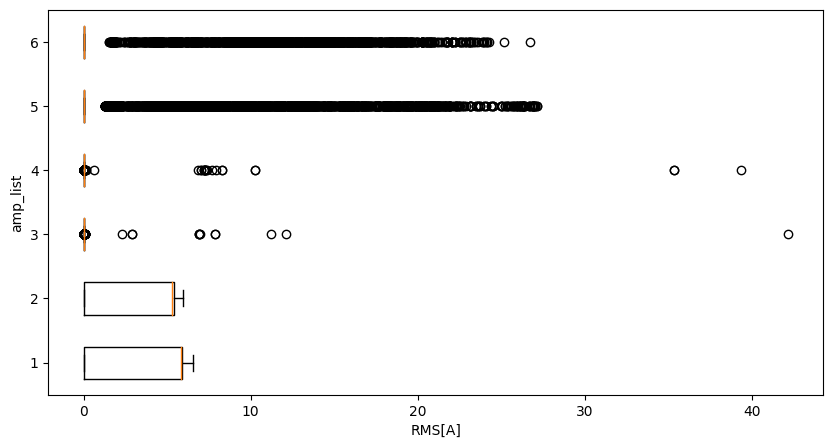

In [75]:
# 이상치 확인
# 3 ~ 6 번 설비 이상치 제거 필요

plt.figure(figsize=(10, 5))
plt.ylabel('amp_list')
plt.xlabel('RMS[A]')

plt.boxplot([df['amp_1'], df['amp_2'], df['amp_3'], 
             df['amp_4'], df['amp_5'], df['amp_6']], vert=False)
plt.show()

# 240225 이상치 제거 필요 

In [24]:
amp ='amp_1'
import pycaret
from pycaret.regression import *
reg1 = setup(
df[['itemno', 'qty', amp]],
target = amp,
categorical_features=['itemno'],
numeric_features=['qty'],
session_id=123,
log_experiment=True,
experiment_name=f'{amp}_opt',
silent=True,
)

,Description,Value
0,session_id,123
1,Target,amp_1
2,Original Data,"(30230, 3)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(21160, 38)"


In [25]:
best_model = compare_models(
include=['lr', 'rf', 'ada'],
sort='MAE'
)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2.2417,6.8134,2.6101,0.1092,0.9295,80.1733,0.5160
lr,Linear Regression,2.2451,6.6911,2.5866,0.1252,0.9265,81.4619,0.4120
ada,AdaBoost Regressor,2.5630,7.0846,2.6616,0.0737,1.0370,147.2854,0.1560


In [26]:
tuned_best_model = tune_model(best_model)
tuned_best_model

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:30:04
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.7s


KeyboardInterrupt: 

In [ ]:
save_model(tuned_best_model, model_name=f'amp_1_best_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['itemno'],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['qty'],
                                       target='amp_1', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nume...
                 ('dummy', Dummify(target='amp_1')),
                 ('fix_perfect', Remove_100(target='amp_1')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough

In [ ]:
# 각각 저장됨
amp_list = ['amp_2', 'amp_3', 'amp_4', 'amp_5', 'amp_6']

for amp in amp_list:
    reg1 = setup(
        df[['itemno', 'qty', amp]],
        target=amp,
        categorical_features=['itemno'],
        numeric_features=['qty'],
        session_id=123,
        log_experiment=True,
        experiment_name=f'{amp}_best_model',
        silent=True
    )
    
    best_model = compare_models(
        include=['lr', 'rf', 'ada'],
        sort='MAE'
    )
    
    tuned_best_model = tune_model(best_model)
    
    # 각각의 amp에 대한 모델을 저장
    save_model(tuned_best_model, model_name=f'{amp}_best_model')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.9670,14.5142,3.8098,0.0013,0.8768,0.8788
1,1.9662,15.2648,3.9070,-0.0054,0.8797,0.8671
2,1.7758,10.8467,3.2934,-0.0049,0.8523,0.8685
3,1.9393,13.6881,3.6997,0.0021,0.8709,0.8570
4,1.8576,12.4077,3.5225,-0.0041,0.8669,0.8685
5,1.8409,11.9989,3.4639,-0.0073,0.8648,0.8615
6,1.8413,12.6701,3.5595,-0.0067,0.8621,0.8540
7,1.9743,15.1479,3.8920,-0.0033,0.8795,0.8614
8,1.8455,12.1212,3.4816,0.0016,0.8611,0.8719
9,1.9246,13.9421,3.7339,-0.0022,0.8739,0.8809


Transformation Pipeline and Model Succesfully Saved


In [ ]:
for amp in amp_list:
    print(f'{amp}_best_model: ')
    loaded_bestmodel = load_model(f'{amp}_best_model')
    print(loaded_bestmodel[-1])

amp_2_best_model: 
Transformation Pipeline and Model Successfully Loaded
AdaBoostRegressor(base_estimator=None, learning_rate=0.3, loss='square',
                  n_estimators=220, random_state=123)
amp_3_best_model: 
Transformation Pipeline and Model Successfully Loaded
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
amp_4_best_model: 
Transformation Pipeline and Model Successfully Loaded
LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True)
amp_5_best_model: 
Transformation Pipeline and Model Successfully Loaded
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
amp_6_best_model: 
Transformation Pipeline and Model Successfully Loaded
LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True)


In [ ]:
from itertools import product
itemno_list = []
qty_list = []
machine_list = []
guide_info_list = list(product(df.itemno.unique(), list(range(1,100)), ['amp_1','amp_2','amp_3','amp_4','amp_5','amp_6']))
for i in guide_info_list:
    itemno_list.append(i[0])
    qty_list.append(i[1])
    machine_list.append(i[2])
guide_info_df = pd.DataFrame(zip(itemno_list, qty_list, machine_list), columns=['itemno', 'qty', 'machine'])
guide_info_df['current'] =0
guide_info_df

,itemno,qty,machine,current
0,9,1,amp_1,0
1,9,1,amp_2,0
2,9,1,amp_3,0
3,9,1,amp_4,0
4,9,1,amp_5,0
...,...,...,...,...
21379,35,99,amp_2,0
21380,35,99,amp_3,0
21381,35,99,amp_4,0
21382,35,99,amp_5,0


In [ ]:
for amp in amp_list:
    loaded_bestmodel = load_model(f'{amp}_best_model')
    amp_index= guide_info_df[guide_info_df['machine']==amp].index
    result = loaded_bestmodel.predict(guide_info_df.loc[amp_index, ('itemno', 'qty')])
    guide_info_df.loc[amp_index, ('current')] = result
guide_info_df.to_csv('guide_info_df.csv', index=False)
guide_info_df = pd.read_csv('guide_info_df.csv')
guide_info_df

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


,itemno,qty,machine,current
0,9,1,amp_1,0.000000
1,9,1,amp_2,2.723170
2,9,1,amp_3,0.002486
3,9,1,amp_4,0.001875
4,9,1,amp_5,1.229248
...,...,...,...,...
21379,35,99,amp_2,2.676702
21380,35,99,amp_3,0.002993
21381,35,99,amp_4,0.004610
21382,35,99,amp_5,7.931641


In [ ]:
# 가상의 생산 요구서 작성
# 생산 가능 일 수
product_day =5

demand = {}
demand[1] =100
demand[2] =100
demand[3] =100
demand[4] =100
demand[5] =100
demand # 특정 itemno (i), 생산해야 하는 qty (q)

{1: 100, 2: 100, 3: 100, 4: 100, 5: 100}

In [ ]:
# set
I = list(set(guide_info_df.itemno)) # 모든 item 이름 list
Q = list(set(guide_info_df.qty)) # 한 번에 생산 가능한 qty list
M = list(set(guide_info_df.machine)) # 생산 machine list
T = list(range(1, product_day+1))
print(f'item list : {I}')
print(f'qty list : {Q}')
print(f'machine list : {M}')
print(f'time list : {T}')

item list : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
qty list : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
machine list : ['amp_3', 'amp_5', 'amp_4', 'amp_1', 'amp_2', 'amp_6']
time list : [1, 2, 3, 4, 5]


In [ ]:
diq = {}
for itemno in I:
    if itemno in set(demand.keys()):
        diq[itemno] = demand[itemno]
    else:
        diq[itemno] =0
diq

{0: 0,
 1: 100,
 2: 100,
 3: 100,
 4: 100,
 5: 100,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0}

In [ ]:
m_ub = {}
for machine in M: # M : 생산 machine
    m_ub[machine] = 80 # machine별 생산 한계값 지정(1일 최대 80개)
m_ub

{'amp_3': 80, 'amp_5': 80, 'amp_4': 80, 'amp_1': 80, 'amp_2': 80, 'amp_6': 80}

In [ ]:
guide_info_df

,itemno,qty,machine,current
0,9,1,amp_1,0.000000
1,9,1,amp_2,2.723170
2,9,1,amp_3,0.002486
3,9,1,amp_4,0.001875
4,9,1,amp_5,1.229248
...,...,...,...,...
21379,35,99,amp_2,2.676702
21380,35,99,amp_3,0.002993
21381,35,99,amp_4,0.004610
21382,35,99,amp_5,7.931641


In [ ]:
# ciqm : item, qty별 machine의 소비전력 예측값

ciqm = {} # 특정 itemno (i), 생산하는 qty (q), 생산 machine (m)에 대한 current dictionary
for index, info in guide_info_df.iterrows():
    ciqm[info['itemno'], info['qty'], info['machine']] = info['current']
ciqm

{(9, 1, 'amp_1'): 0.0,
 (9, 1, 'amp_2'): 2.7231700370994893,
 (9, 1, 'amp_3'): 0.0024864673614501,
 (9, 1, 'amp_4'): 0.0018751218449324,
 (9, 1, 'amp_5'): 1.229248046875,
 (9, 1, 'amp_6'): 0.6818312406539917,
 (9, 2, 'amp_1'): 0.0,
 (9, 2, 'amp_2'): 2.7231700370994893,
 (9, 2, 'amp_3'): 0.0024916529655456,
 (9, 2, 'amp_4'): 0.001903026481159,
 (9, 2, 'amp_5'): 1.297607421875,
 (9, 2, 'amp_6'): 0.7488590478897095,
 (9, 3, 'amp_1'): 0.0,
 (9, 3, 'amp_2'): 2.7231700370994893,
 (9, 3, 'amp_3'): 0.0024967789649963,
 (9, 3, 'amp_4'): 0.0019309311173856,
 (9, 3, 'amp_5'): 1.365966796875,
 (9, 3, 'amp_6'): 0.8158867955207825,
 (9, 4, 'amp_1'): 0.0,
 (9, 4, 'amp_2'): 2.7231700370994893,
 (9, 4, 'amp_3'): 0.0025019645690917,
 (9, 4, 'amp_4'): 0.0019588356371968,
 (9, 4, 'amp_5'): 1.4345703125,
 (9, 4, 'amp_6'): 0.8829146027565002,
 (9, 5, 'amp_1'): 0.0,
 (9, 5, 'amp_2'): 2.8375036767289608,
 (9, 5, 'amp_3'): 0.0025071501731872,
 (9, 5, 'amp_4'): 0.0019867403898388,
 (9, 5, 'amp_5'): 1.5029296875

In [ ]:
# xiqt : KAMP_optimization를 시킨 모델의 소비전력 예측값 

model = mip.Model("KAMP_optimization")
xiqt = {
    (i, q, t): model.add_var(var_type=mip.BINARY, name=f"x_{i}_{str(q)}_{str(t)}" )
    for i in I for q in Q for t in T
}
xiqt

{(0, 1, 1): <mip.entities.Var at 0x205b6304370>,
 (0, 1, 2): <mip.entities.Var at 0x205b657ee80>,
 (0, 1, 3): <mip.entities.Var at 0x205b657eb50>,
 (0, 1, 4): <mip.entities.Var at 0x205b657e070>,
 (0, 1, 5): <mip.entities.Var at 0x205b657e1f0>,
 (0, 2, 1): <mip.entities.Var at 0x205b657ecd0>,
 (0, 2, 2): <mip.entities.Var at 0x205b657e730>,
 (0, 2, 3): <mip.entities.Var at 0x205b657e4c0>,
 (0, 2, 4): <mip.entities.Var at 0x205b657ec10>,
 (0, 2, 5): <mip.entities.Var at 0x205b657e550>,
 (0, 3, 1): <mip.entities.Var at 0x205b657e820>,
 (0, 3, 2): <mip.entities.Var at 0x205b657e490>,
 (0, 3, 3): <mip.entities.Var at 0x205b657e580>,
 (0, 3, 4): <mip.entities.Var at 0x205b657ee20>,
 (0, 3, 5): <mip.entities.Var at 0x205b657e190>,
 (0, 4, 1): <mip.entities.Var at 0x205b657eb20>,
 (0, 4, 2): <mip.entities.Var at 0x205b657ea90>,
 (0, 4, 3): <mip.entities.Var at 0x205b657e130>,
 (0, 4, 4): <mip.entities.Var at 0x205b657e0a0>,
 (0, 4, 5): <mip.entities.Var at 0x205b657e370>,
 (0, 5, 1): <mip.ent

In [ ]:
# ciqm, xiqt 가중치 계산, 최소화하도록 지정

model.objective = mip.minimize(
    mip.xsum(ciqm[i, q, m]*xiqt[i, q, t] for i in I for q in Q for t in T for m in M)
    )

In [ ]:
diq[1]

100

In [ ]:
# I : 0~35
# Q : 1~99
# T : 1~5


# Constraint 1
for i in I:
    model += (mip.xsum(q*xiqt[i, q, t] for q in Q for t in T) >= diq[i])
# Constraint 2
for m in M:
    for t in T:
        model += (mip.xsum(ciqm[i, q, m]*xiqt[i, q, t] for i in I for q in Q) <= m_ub[m])
# Constraint 3
for i in I:
    for t in T:
        model += (mip.xsum(xiqt[i, q, t]for q in Q) <= 1)

In [ ]:
model.optimize(max_seconds=30)

<OptimizationStatus.OPTIMAL: 0>

In [ ]:
# 최적화된 목적함수의 값 출력 
print(f'objective value : current {model.objective_value}')

objective value : current 112.29199581704547


In [ ]:
solution = []
for i in I:
    for q in Q:
        for t in T:
            solution.append([xiqt[i, q, t].name, xiqt[i, q, t].x])
solution = pd.DataFrame(
    solution,
    columns=['variable', 'solution'])
solution = solution[solution['solution']>0].reset_index(drop=True)
solution.sort_values(['variable', 'solution'], inplace=True)
solution

,variable,solution
0,x_1_27_5,1.0
1,x_1_73_4,1.0
2,x_2_27_1,1.0
3,x_2_73_2,1.0
4,x_3_27_1,1.0
5,x_3_73_2,1.0
6,x_4_27_3,1.0
7,x_4_73_1,1.0
8,x_5_19_3,1.0
9,x_5_81_2,1.0


In [ ]:
final_result = []
for idx, value in solution.iterrows():
    variable = value['variable'].split('_')
    final_result.append([variable[1], variable[3], variable[2]])
final_result = pd.DataFrame(final_result, columns=['itemno', 'day', 'qty'])
final_result.sort_values(['itemno', 'day'], inplace=True)
final_result.to_csv('final_result.csv', index=False)
pd.read_csv('final_result.csv')

,itemno,day,qty
0,1,4,73
1,1,5,27
2,2,1,27
3,2,2,73
4,3,1,27
5,3,2,73
6,4,1,73
7,4,3,27
8,5,2,81
9,5,3,19


In [ ]:
plot_result = []
for i in list(demand.keys()):
    for t in list(T):
        check_df = final_result[(final_result['day']==str(t))&(final_result['itemno']==str(i))]
        if len(check_df) >0:
            plot_result.append([t, i, int(check_df.qty.values[0])])
        else:
            plot_result.append([t, i, 0])
plot_df = pd.DataFrame(plot_result, columns=['day', 'itemno', 'qty'])
plot_df

,day,itemno,qty
0,1,1,0
1,2,1,0
2,3,1,0
3,4,1,73
4,5,1,27
5,1,2,27
6,2,2,73
7,3,2,0
8,4,2,0
9,5,2,0


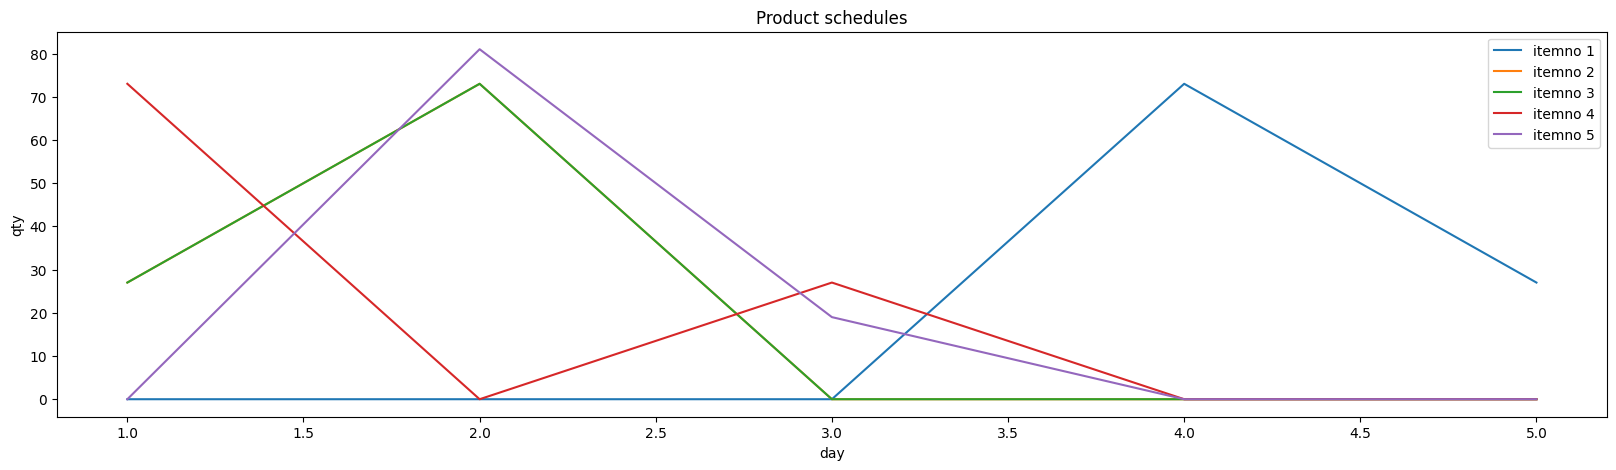

In [ ]:
from cProfile import label
plt.figure(figsize=(20, 5))
plt.title(f'Product schedules')
for i in list(demand.keys()):
    df_result = plot_df[plot_df['itemno']==i]
    plt.xlabel('day')
    plt.ylabel('qty')
    plt.plot(df_result['day'], df_result['qty'], label=f'itemno {i}')
plt.legend()
plt.show()

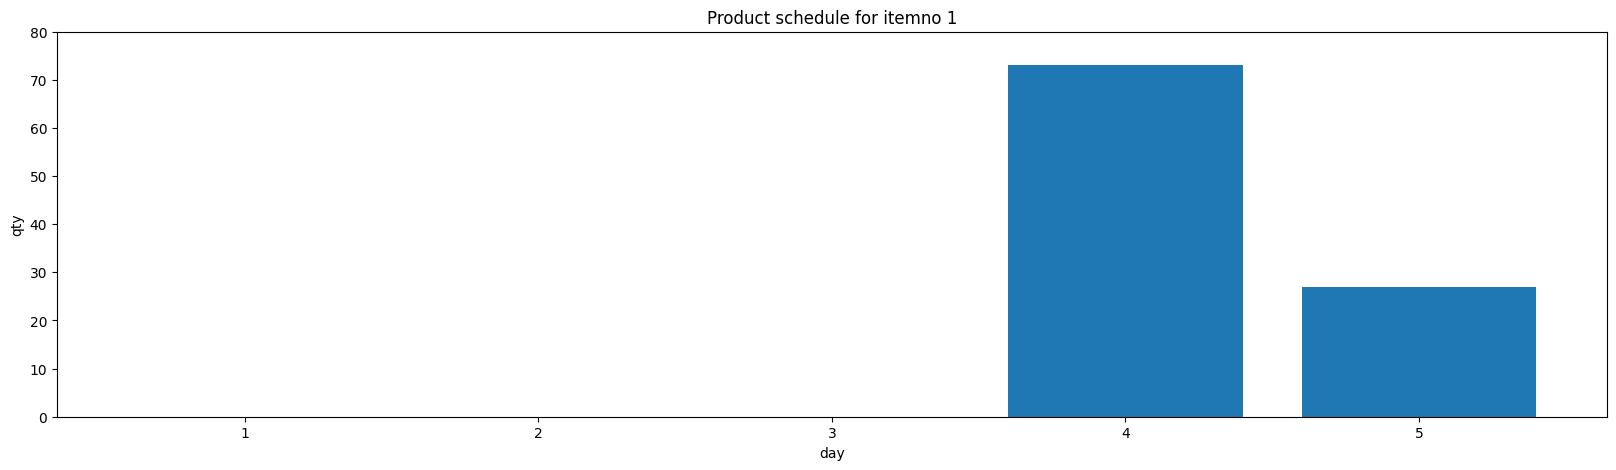

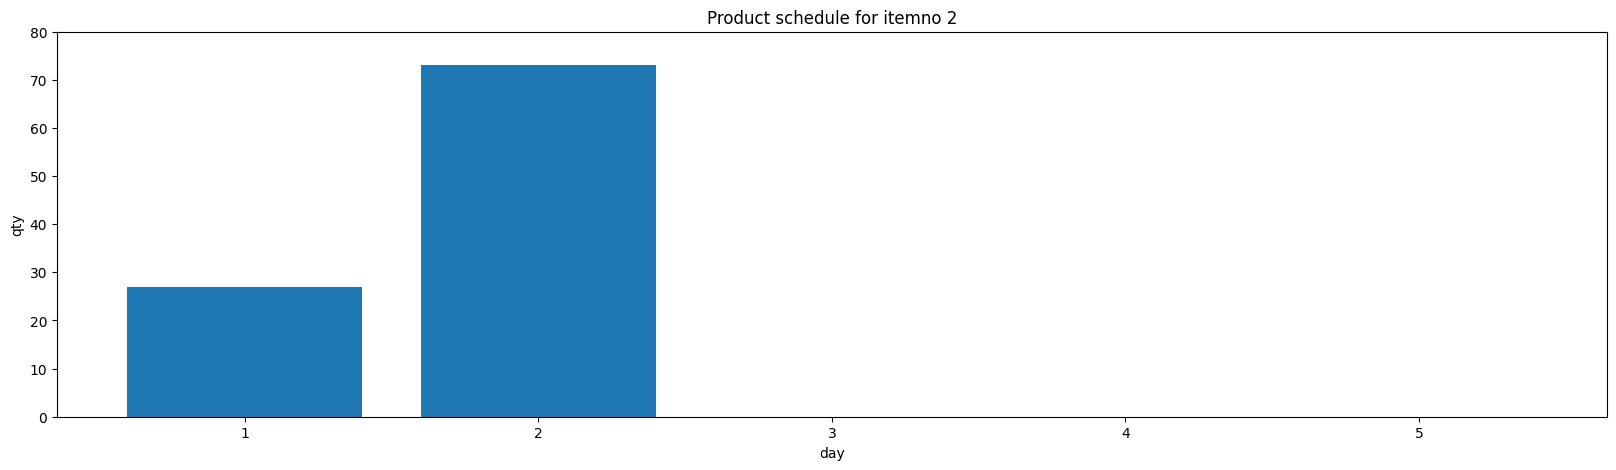

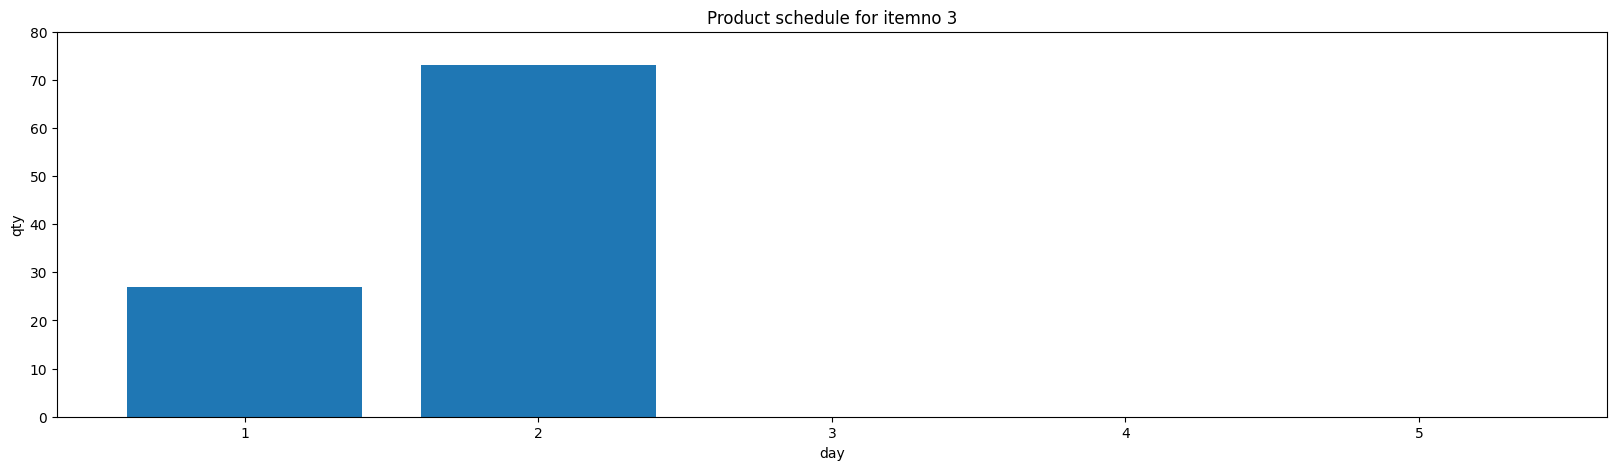

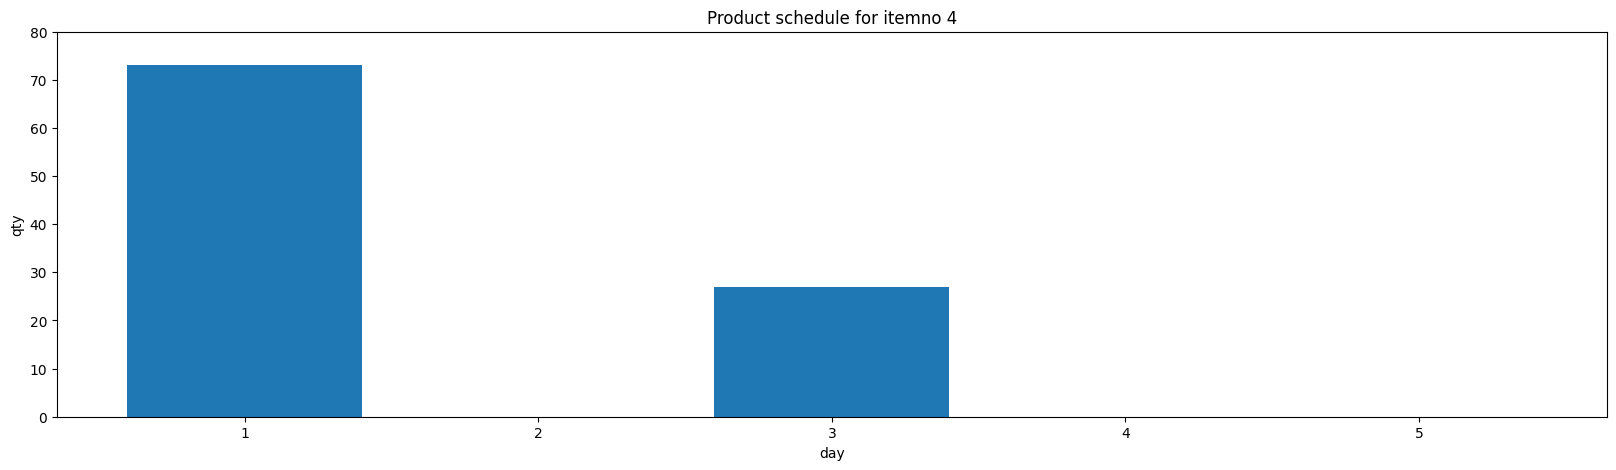

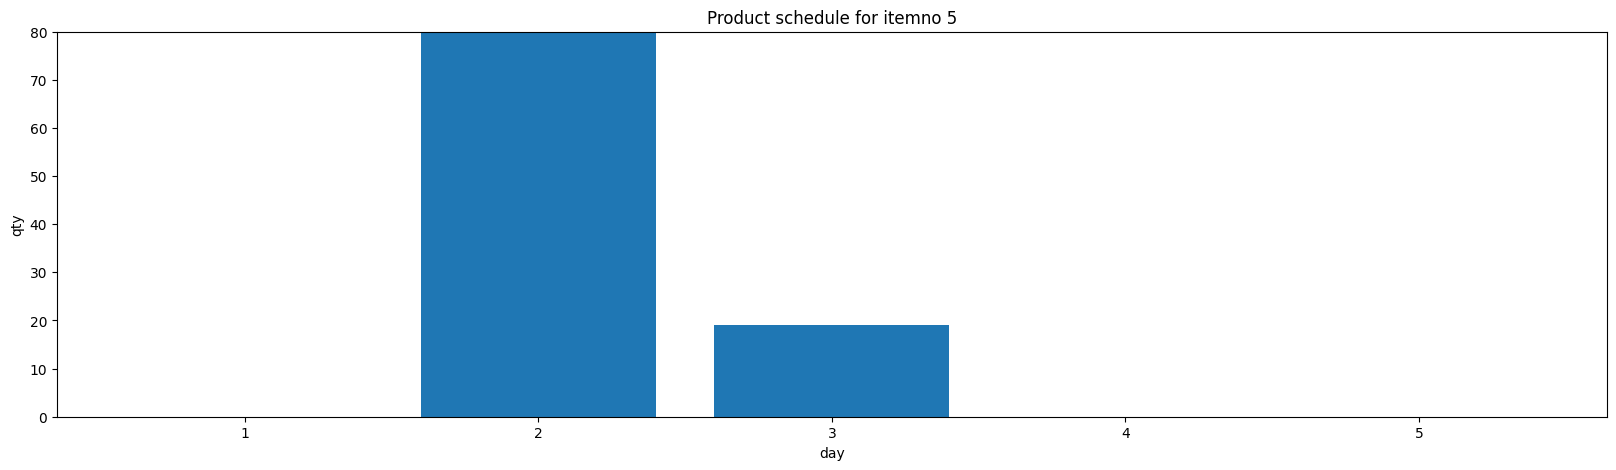

In [ ]:
for i in list(demand.keys()):
    df_result = plot_df[plot_df['itemno']==i]
    plt.figure(figsize=(20, 5))
    plt.xlabel('day')
    plt.ylabel('qty')
    plt.title(f'Product schedule for itemno {i}')
    plt.bar(df_result['day'], df_result['qty'])
    plt.ylim(ymin=0, ymax=80)
    plt.show()

In [ ]:
# 하루에 균일하게 만드는 경우
total_current_not_opt =0
for i in list(demand.keys()):
    for m in M:
        total_current_not_opt += ciqm[1,20,m]
total_current_not_opt = total_current_not_opt*5
save_current = total_current_not_opt-model.objective_value
print(f'최적화 하지 않은 생산 계획의 전류량: {round(total_current_not_opt, 2)} [A]')
print(f'자원 최적화 생산 계획의 전류량: {round(model.objective_value, 2)} [A]')
print(f'전류 감축량: {round(save_current, 2)} [A]')
print(f'전류 감축비율: {round(save_current/total_current_not_opt, 2)*100}%')

최적화 하지 않은 생산 계획의 전류량: 179.15 [A]
자원 최적화 생산 계획의 전류량: 112.29 [A]
전류 감축량: 66.85 [A]
전류 감축비율: 37.0%
